In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedShuffleSplit
# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows = 6000
pd.options.display.max_columns = 80

data = pd.read_csv('./brazilian-cities/BRAZIL_CITIES.csv', sep=";", decimal=",")

##note que a df está sem a feature AREA e RURAL_URBAN

ft1 = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df1 = data[ft1]

ft = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT" ,"ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df = data[ft]

In [3]:
df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['ALT'] = df['ALT'].astype(float)
#df['AREA'] = df['AREA'].astype(float)
#df['RURAL_URBAN'] = df['RURAL_URBAN'].astype(float)
df['GVA_AGROPEC'] = df['GVA_AGROPEC'].astype(float)
df['GVA_INDUSTRY'] = df['GVA_INDUSTRY'].astype(float)
df['GVA_SERVICES'] = df['GVA_SERVICES'].astype(float)
df['GVA_PUBLIC'] = df['GVA_PUBLIC'].astype(float)
df['TAXES'] = df['TAXES'].astype(float)
df['GDP'] = df['GDP'].astype(float)
#df['GDP_CAPITA'] = df['GDP_CAPITA'].astype(float)


In [4]:
df1['IDHM'] = df1['IDHM'].astype(float)

def get_rotulo(value):
    if value >= 0.8:
        return "muito_alto"
    elif 0.69 < value <= 0.79:
        return "alto"
    elif 0.59 < value <= 0.69:
        return "médio"
    elif 0.49 < value <= 0.59:
        return "baixo"
    else:
        return "muito_baixo"

df["rótulo"] = df1['IDHM'].apply(get_rotulo)

In [5]:
print(len(df.columns))

67


In [6]:
print(df.dtypes)

IBGE_RES_POP              float64
IBGE_RES_POP_BRAS         float64
IBGE_RES_POP_ESTR         float64
IBGE_DU                   float64
IBGE_DU_URBAN             float64
IBGE_DU_RURAL             float64
IBGE_POP                  float64
IBGE_1                    float64
IBGE_1-4                  float64
IBGE_5-9                  float64
IBGE_10-14                float64
IBGE_15-59                float64
IBGE_60+                  float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
LONG                      float64
LAT                       float64
ALT                       float64
PAY_TV                    float64
FIXED_PHONES              float64
ESTIMATED_POP             float64
GVA_AGROPEC               float64
GVA_INDUSTRY              float64
GVA_SERVICES              float64
GVA_PUBLIC                float64
TAXES                     float64
GDP                       float64
POP_GDP                   float64
MUN_EXPENDIT              float64
COMP_TOT      

In [7]:
df=  df.fillna(0)

In [8]:
#separação da classe em y
X = df.iloc[:, 0:65].values
y = df.iloc[:, 66].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [10]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7942583732057417

### Classification report

In [11]:
target_names = ['muito baixo', 'baixo', 'médio', 'alto', 'muito alto']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 muito baixo       0.84      0.88      0.86       625
       baixo       0.79      0.73      0.76       364
       médio       0.40      0.27      0.32        15
        alto       1.00      0.07      0.13        14
  muito alto       0.75      0.77      0.76       654

    accuracy                           0.79      1672
   macro avg       0.76      0.55      0.57      1672
weighted avg       0.79      0.79      0.79      1672



Feature ranking:
1. feature 16 (0.089521)
2. feature 15 (0.071762)
3. feature 59 (0.046049)
4. feature 19 (0.044486)
5. feature 37 (0.042947)
6. feature 5 (0.042692)
7. feature 32 (0.026577)
8. feature 1 (0.024089)
9. feature 42 (0.023949)
10. feature 27 (0.023544)
11. feature 0 (0.022978)
12. feature 38 (0.022913)
13. feature 20 (0.022344)
14. feature 29 (0.018915)
15. feature 13 (0.018740)
16. feature 17 (0.018700)
17. feature 3 (0.016491)
18. feature 23 (0.016118)
19. feature 14 (0.015856)
20. feature 60 (0.015606)
21. feature 43 (0.014654)
22. feature 25 (0.014431)
23. feature 21 (0.014404)
24. feature 18 (0.014153)
25. feature 22 (0.013932)
26. feature 47 (0.013420)
27. feature 24 (0.013265)
28. feature 35 (0.013178)
29. feature 12 (0.013066)
30. feature 30 (0.012821)
31. feature 36 (0.012591)
32. feature 8 (0.012203)
33. feature 41 (0.012155)
34. feature 61 (0.011835)
35. feature 9 (0.011283)
36. feature 10 (0.010996)
37. feature 4 (0.010956)
38. feature 11 (0.010639)
39. feature

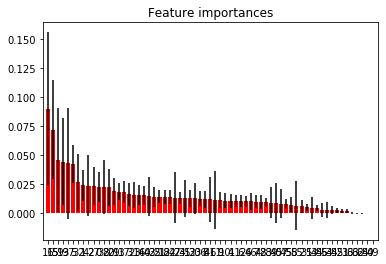

In [12]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

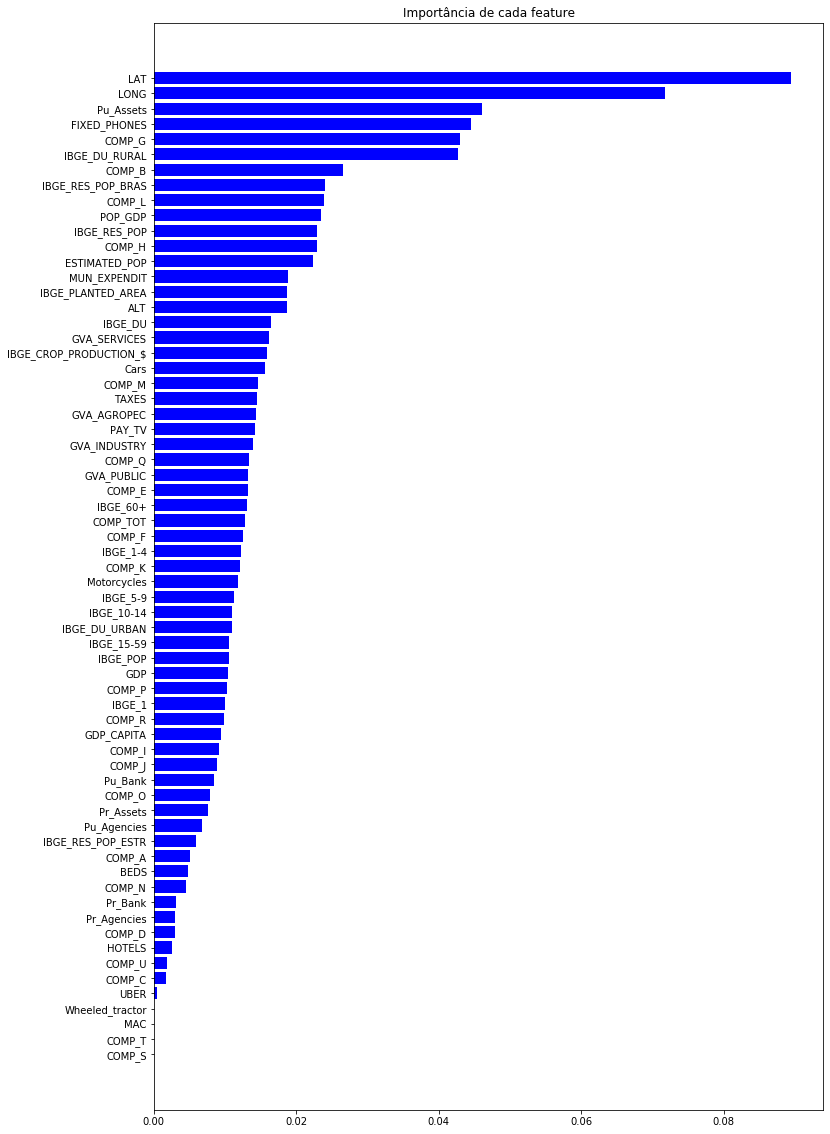

In [13]:
features = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 20))
plt.title('Importância de cada feature')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()


In [14]:
def metrics (y_test, y_pred):
  ac = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test,y_pred, average= 'weighted')
  prec = precision_score(y_test,y_pred, average='weighted')
  return (ac, rec, prec)

In [15]:
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)

acuracia = 0.7942583732057417 , recall = 0.7942583732057417 , precisao = 0.7942607262497031 


## class_weight = Balanced

In [16]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model2 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               class_weight = 'balanced')

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
model2.score(X_test, y_test)

0.7924641148325359

### Classification Report

In [17]:
target_names = ['muito baixo', 'baixo', 'médio', 'alto', 'muito alto']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

 muito baixo       0.84      0.88      0.86       625
       baixo       0.80      0.73      0.76       364
       médio       0.50      0.20      0.29        15
        alto       1.00      0.14      0.25        14
  muito alto       0.74      0.77      0.76       654

    accuracy                           0.79      1672
   macro avg       0.78      0.54      0.58      1672
weighted avg       0.79      0.79      0.79      1672



#### Confusion_matrix 

In [18]:
confusion_matrix(y_test, y_pred2, labels=['muito baixo', 'baixo', 'médio', 'alto', 'muito alto'])

array([[  0,   0,   0,   0,   0],
       [  0, 265,  99,   0,   0],
       [  0,  57, 506,  91,   0],
       [  0,   0,  74, 549,   0],
       [  0,   0,   0,   0,   0]])

## With Stratified Shuffle Split

In [25]:
#separação da classe em y
X = df.iloc[:, 0:65].values
y = df.iloc[:, 66].values

In [26]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.8, random_state=0) 
sss.get_n_splits(X, y)

5

In [27]:
print(sss)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.8,
            train_size=None)


In [31]:
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [1360 2966 1983 ... 4539 2483 5552] TEST: [5487 1415 4643 ... 2043 5253 3754]
TRAIN: [4108 4625 4236 ... 4732 3014 4635] TEST: [3579 2495 5124 ... 3114 1481  947]
TRAIN: [3332 4453 1070 ... 1493 5336 5027] TEST: [5429  732 2080 ... 4424 2234 3716]
TRAIN: [3568 4339   70 ... 1914 4181  709] TEST: [1435 5270  763 ... 2138  656 3343]
TRAIN: [2191 4632 2264 ... 5114 1069  910] TEST: [5465 3011 4881 ... 4448 5509 1921]


In [32]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7674366449876654

### Classification Report

In [33]:
target_names = ['muito baixo', 'baixo', 'médio', 'alto', 'muito alto']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 muito baixo       0.82      0.89      0.85      1654
       baixo       0.75      0.68      0.71       950
       médio       0.57      0.10      0.17        40
        alto       0.00      0.00      0.00        34
  muito alto       0.73      0.73      0.73      1781

    accuracy                           0.77      4459
   macro avg       0.57      0.48      0.49      4459
weighted avg       0.76      0.77      0.76      4459

